In [1]:
import tifffile

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
a = tifffile.imread('/mnt/LSDF/users/zharov/xeno_rere/13_3_phase_reco_v2.tif')
b = tifffile.imread('/mnt/LSDF/users/zharov/xeno_rere_proc/13_3_phase_reco_v2.tif')

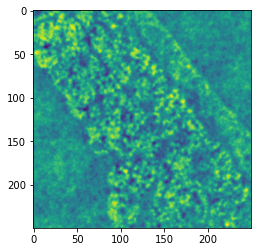

In [6]:
plt.imshow(a[1000, 1000:1250, 1000:1250])

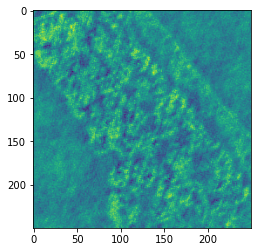

In [7]:
plt.imshow(b[1000, 1000:1250, 1000:1250])

In [8]:
c = tifffile.imread('/mnt/LSDF/users/zharov/xeno_reproj/13_3_phase_proj.tif')

In [12]:
# import foam_ct_phantom 
import numpy as np
from pathlib import Path
# from noise2inverse import tiffs, noise, tomo, fig
import tomosipo as ts
import tomopy
import tifffile

In [13]:
c.shape

(751, 2016, 2016)

In [14]:
# Determine geometry
num_angles, height, width = c.shape

vol_shape = (height, width * 2 // 3, width * 2 // 3)
det_shape = (height, width)
angles = np.linspace(0, np.pi, num=num_angles, endpoint=False)
vg = ts.volume(size=vol_shape, pos=0, shape=vol_shape)
pg = ts.parallel(angles=angles, size=det_shape, shape=det_shape)
A = ts.operator(vg, pg)

In [23]:
from reco_helper import reconstruct_one_slice

In [27]:
c.shape

(751, 2016, 2016)

In [30]:
c = np.moveaxis(c, 1, 0)

In [31]:
cr = reconstruct_one_slice(c[[1000]], n_proj=751, imsize=2016)

ValueError: Cannot fill with the provided array.Expecting (751, 1988) got (1, 751, 1988)